# Alumnos

In [53]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 50)
pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

## Lectura de datos

In [55]:
df = pd.read_csv("datasets/alumnos/Alumnos.csv")
df.shape

(23, 20)

In [56]:
df.head(50)

,Apellido Paterno,Apellido Materno,Nombre,Alias (opcional),Fecha de nacimiento,Sexo,Edad,Altura,# Hermanos (as),Número de zapato,Carrera,Escuela,Trabajo,Sueldo Esperado,Sueldo,Lugar de Trabajo,# Materias reprobadas,Calificación esperada Módulo 2,Promedio final,Saben python
0,GARCIA,TREJO,OMAR,ALEX,26/12/1997,M,27,170,2,7.00,MATEMATICAS,FACULTAD DE CIENCIAS UNAM,BUSINESS INTELLIGENCE ANALYST,"$20,000",NaN,TOTALPLAY,2.00,10,8.96,SI
1,PÉREZ,MENDOZA,ERICK,ERICK,29/10/2000,M,24,175,2,7.50,MATEMÁTICAS APLICADAS Y COMPUTACIÓN,FES ACATLÁN,DATA SCIENTIST,100000,NaN,KONESH,8.00,9.999999,8.76,SI
2,GUZMÁN,GÓMEZ,JUAN PABLO,NaN,17/8/1995,M,29,170,1,8.50,ACTUARÍA,FES ACATLÁN,ESPECIALISTA EN OPERACIONES,"$18,000",NaN,TOKIO MARINE,8.00,10,7.9,SI
3,CASTRO,CHÁVEZ,HAROLD,HARRY,23/01/2000,M,25,185,3,8.00,MAC,FES ACATLÁN,DATA SCIENTIST,"100,000",NaN,BBVA,15.00,√81,Trunco,Si
4,RENDÓN,ROSAS,RODOLFO,RODO,31/12/1996,H,28,165,1,6.00,ACTUARÍA,FES ACATLAN,ANALISTA CIENCIA DE DATOS,50000,NaN,UNIVERSAL MUSIC,14.00,9.5,7.56,SI
5,SALAS,CATONGA,JAVIER EMILIO,NaN,19/10/1996,M,28,175,2,27.00,FISICA,FACULTAD DE CIENCIAS UNAM,ANALISTA PLD,"$50,000",NaN,HACIENDA,1.00,10,9.2,SI
6,BLAS,DURAN,GUSTAVO,GUS,11/03/1999,H,26,167,2,27.00,INGENIERÍA EN COMPUTACIÓN,UAEMéx,ANALISTA DE DATOS,NaN,NaN,BANORTE,1.00,9.5,9,SI
7,AMBRIZ,PADILLA,JOSE ALBERTO,NaN,07-03-1994,H,31,170,1,26.00,ADMINISTRACION INDUSTRIAL,UPIICSA,ANALISTA DE DATOS,"$17,000",NaN,ELEKTRA,1.00,NaN,8.83,INTERMEDIO
8,VAZQUEZ,GONZALEZ,MIGUEL,MIGUE,15/4/1993,M,31,165,3,26.00,MATEMATICAS,UDG,PROCESS DEVELOPMENT LEAD,"$60,000",NaN,NIELSENIQ,0.00,10,8.1,BASICO
9,DÍAZ,ALBARRAN,ANA LISSETTE,ANA,20/09/1994,F,30,165,2,24.00,MATEMATICAS,FACULTAD DE CIENCIAS,ESPECIALISTA DE DATOS,NaN,NaN,BANORTE,NaN,10,NaN,BASICO


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Apellido Paterno                23 non-null     object 
 1   Apellido Materno                23 non-null     object 
 2   Nombre                          23 non-null     object 
 3   Alias (opcional)                15 non-null     object 
 4   Fecha de nacimiento             23 non-null     object 
 5   Sexo                            23 non-null     object 
 6   Edad                            23 non-null     int64  
 7   Altura                          23 non-null     int64  
 8   # Hermanos (as)                 23 non-null     int64  
 9   Número de zapato                23 non-null     float64
 10  Carrera                         23 non-null     object 
 11  Escuela                         23 non-null     object 
 12  Trabajo                         22 non

In [58]:
df['Nombre Completo'] = df[['Nombre', 'Apellido Paterno','Apellido Materno']].apply(lambda x: ' '.join(x), axis=1)
df['Nombre Completo'] = df['Nombre Completo'].apply(lambda x: x.upper())

In [59]:
df['Fecha de nacimiento'] = pd.to_datetime(df['Fecha de nacimiento'], format='mixed')
df['Edad'] = df['Fecha de nacimiento'].map(lambda x: 2025 - x.year)
df['Edad'].describe(np.linspace(0,1,6))

count   23.00
mean    28.74
std      4.81
min     24.00
0%      24.00
20%     25.00
40%     26.80
50%     27.00
60%     29.00
80%     31.00
100%    42.00
max     42.00
Name: Edad, dtype: float64

In [60]:
df['Sueldo Esperado'] = df['Sueldo Esperado'].str.replace('$','')
df['Sueldo Esperado'] = df['Sueldo Esperado'].str.replace(' ','')
df['Sueldo Esperado'] = df['Sueldo Esperado'].str.replace(',','')
df['Sueldo Esperado'] = df['Sueldo Esperado'].astype(float)
df['Sueldo Esperado'] = df['Sueldo Esperado'].fillna(df['Sueldo Esperado'].median())
df['Sueldo Esperado'].describe(percentiles=np.linspace(0,1,11))

count        23.00
mean     47,173.91
std      39,891.50
min      17,000.00
0%       17,000.00
10%      18,000.00
20%      20,000.00
30%      20,000.00
40%      26,600.00
50%      36,000.00
60%      46,000.00
70%      50,000.00
80%      56,000.00
90%      96,000.00
100%    190,000.00
max     190,000.00
Name: Sueldo Esperado, dtype: float64

#### Limpieza de datos

In [61]:
df['Número de zapato'] = np.where(df['Número de zapato']<10, df['Número de zapato']+20, df['Número de zapato'])

In [62]:
df['# Materias reprobadas'] = df['# Materias reprobadas'].fillna(0)

In [63]:
df.loc[df['Calificación esperada Módulo 2'] == '√81', 'Calificación esperada Módulo 2'] = 9
df['Calificación esperada Módulo 2'] = df['Calificación esperada Módulo 2'].astype(float)
df['Calificación esperada Módulo 2'] = df['Calificación esperada Módulo 2'].fillna(df['Calificación esperada Módulo 2'].mean())

In [64]:
df.loc[df['Promedio final'] == 'Trunco', 'Promedio final'] = df.loc[df['Promedio final'] == 'Trunco', 'Calificación esperada Módulo 2']
df['Promedio final'] = df['Promedio final'].astype(float)
df['Promedio final'] = df['Promedio final'].fillna(df['Promedio final'].median())

## Ingenieria de Variables

##### Nivel de Python

In [65]:
# Variable sabe python
df['Saben python'] = df['Saben python'].apply(lambda x: str(x).upper())
df['Saben python'].value_counts()

Saben python
SI                   15
BASICO                4
INTERMEDIO            2
BÁSICO                1
BASICO-INTERMEDIO     1
Name: count, dtype: int64

In [66]:
df['Nivel Python'] = df['Saben python'].map({'SI': 3, 
                                             'INTERMEDIO':2, 'BASICO-INTERMEDIO':2,
                                             'BASICO': 1, 'BÁSICO':1})
df['Nivel Python'] = df['Nivel Python'].fillna(1)
df['Nivel Python'].value_counts()

Nivel Python
3.00    15
1.00     5
2.00     3
Name: count, dtype: int64

##### Promedio de sueldo por Nivel de Python

In [67]:
df.groupby(['Nivel Python', '# Materias reprobadas'])['Sueldo Esperado']\
    .agg(['mean', 'min', 'max'])\
    .rename(columns={'mean':'mean_NvlPy_MatRep_SueldoEsp', 'min':'min_NvlPy_MatRep_SueldoEsp', 'max':'max_NvlPy_MatRep_SueldoEsp'})\
    .reset_index()

,Nivel Python,# Materias reprobadas,mean_NvlPy_MatRep_SueldoEsp,min_NvlPy_MatRep_SueldoEsp,max_NvlPy_MatRep_SueldoEsp
0,1.00,0.00,"95,333.33","36,000.00","190,000.00"
1,1.00,4.00,"20,000.00","20,000.00","20,000.00"
2,1.00,9.00,"18,000.00","18,000.00","18,000.00"
3,2.00,1.00,"17,000.00","17,000.00","17,000.00"
4,2.00,2.00,"50,000.00","50,000.00","50,000.00"
5,3.00,0.00,"31,250.00","17,000.00","45,000.00"
6,3.00,1.00,"35,333.33","20,000.00","50,000.00"
7,3.00,2.00,"20,000.00","20,000.00","20,000.00"
8,3.00,4.00,"41,666.67","20,000.00","80,000.00"
9,3.00,8.00,"59,000.00","18,000.00","100,000.00"


In [68]:
df = df.merge(
    df.groupby(['Nivel Python', '# Materias reprobadas'])['Sueldo Esperado']\
      .agg(['mean', 'min', 'max'])\
      .rename(columns={'mean':'mean_NvlPy_MatRep_SueldoEsp', 'min':'min_NvlPy_MatRep_SueldoEsp', 'max':'max_NvlPy_MatRep_SueldoEsp'})\
      .reset_index(), 
    on=['Nivel Python', '# Materias reprobadas'],
    how='left')

##### Materias reprobadas y promedio

In [69]:
df = df.merge(
    df.groupby(['# Materias reprobadas'])['Calificación esperada Módulo 2']\
      .agg(['mean', 'min', 'max'])\
      .rename(columns={'mean':'mean_MatRep', 'min':'min_MatRep', 'max':'max_MatRep'})\
      .reset_index(),
    on=['# Materias reprobadas'],
    how='left')

##### Sexo

In [70]:
df['Sexo'].value_counts()

Sexo
H    12
M     9
F     2
Name: count, dtype: int64

In [71]:
df['Sexo'] = df['Sexo'].map({'H':'M', 'F':'F', 'M':'M'})

df['Sexo'].value_counts()

Sexo
M    21
F     2
Name: count, dtype: int64

##### Team Data

In [72]:
def team_data(x):
    x = str(x).upper()
    team_data = ['DATA', 'DATOS']
    for i in team_data:
        if i in x:
            return 1
    return 0

In [73]:
df['TEAM DATA'] = df['Trabajo'].apply(lambda x: team_data(x))
df['TEAM DATA'].value_counts()

TEAM DATA
0    15
1     8
Name: count, dtype: int64

##### Master

In [74]:
def trabajo_level(x):
    x = str(x).upper()

    for _ in ['DIRECTOR']:
        if _ in x:
            return 3

    for _ in ['COORDINATOR', 'MANAGER', 'LEAD']:
        if _ in x:
            return 2
    
    if x != np.nan:
        return 1

    return 0

In [75]:
df['Trabajo_Level'] = df['Trabajo'].apply(lambda x: trabajo_level(x))
df['Trabajo_Level'].value_counts()

Trabajo_Level
1    19
2     3
3     1
Name: count, dtype: int64

In [76]:
df

,Apellido Paterno,Apellido Materno,Nombre,Alias (opcional),Fecha de nacimiento,Sexo,Edad,Altura,# Hermanos (as),Número de zapato,Carrera,Escuela,Trabajo,Sueldo Esperado,Sueldo,Lugar de Trabajo,# Materias reprobadas,Calificación esperada Módulo 2,Promedio final,Saben python,Nombre Completo,Nivel Python,mean_NvlPy_MatRep_SueldoEsp,min_NvlPy_MatRep_SueldoEsp,max_NvlPy_MatRep_SueldoEsp,mean_MatRep,min_MatRep,max_MatRep,TEAM DATA,Trabajo_Level
0,GARCIA,TREJO,OMAR,ALEX,1997-12-26,M,28,170,2,27.00,MATEMATICAS,FACULTAD DE CIENCIAS UNAM,BUSINESS INTELLIGENCE ANALYST,"20,000.00",NaN,TOTALPLAY,2.00,10.00,8.96,SI,OMAR GARCIA TREJO,3.00,"20,000.00","20,000.00","20,000.00",9.33,9.00,10.00,0,1
1,PÉREZ,MENDOZA,ERICK,ERICK,2000-10-29,M,25,175,2,27.50,MATEMÁTICAS APLICADAS Y COMPUTACIÓN,FES ACATLÁN,DATA SCIENTIST,"100,000.00",NaN,KONESH,8.00,10.00,8.76,SI,ERICK PÉREZ MENDOZA,3.00,"59,000.00","18,000.00","100,000.00",10.00,10.00,10.00,1,1
2,GUZMÁN,GÓMEZ,JUAN PABLO,NaN,1995-08-17,M,30,170,1,28.50,ACTUARÍA,FES ACATLÁN,ESPECIALISTA EN OPERACIONES,"18,000.00",NaN,TOKIO MARINE,8.00,10.00,7.90,SI,JUAN PABLO GUZMÁN GÓMEZ,3.00,"59,000.00","18,000.00","100,000.00",10.00,10.00,10.00,0,1
3,CASTRO,CHÁVEZ,HAROLD,HARRY,2000-01-23,M,25,185,3,28.00,MAC,FES ACATLÁN,DATA SCIENTIST,"100,000.00",NaN,BBVA,15.00,9.00,9.00,SI,HAROLD CASTRO CHÁVEZ,3.00,"100,000.00","100,000.00","100,000.00",9.00,9.00,9.00,1,1
4,RENDÓN,ROSAS,RODOLFO,RODO,1996-12-31,M,29,165,1,26.00,ACTUARÍA,FES ACATLAN,ANALISTA CIENCIA DE DATOS,"50,000.00",NaN,UNIVERSAL MUSIC,14.00,9.50,7.56,SI,RODOLFO RENDÓN ROSAS,3.00,"50,000.00","50,000.00","50,000.00",9.50,9.50,9.50,1,1
5,SALAS,CATONGA,JAVIER EMILIO,NaN,1996-10-19,M,29,175,2,27.00,FISICA,FACULTAD DE CIENCIAS UNAM,ANALISTA PLD,"50,000.00",NaN,HACIENDA,1.00,10.00,9.20,SI,JAVIER EMILIO SALAS CATONGA,3.00,"35,333.33","20,000.00","50,000.00",9.72,9.38,10.00,0,1
6,BLAS,DURAN,GUSTAVO,GUS,1999-11-03,M,26,167,2,27.00,INGENIERÍA EN COMPUTACIÓN,UAEMéx,ANALISTA DE DATOS,"36,000.00",NaN,BANORTE,1.00,9.50,9.00,SI,GUSTAVO BLAS DURAN,3.00,"35,333.33","20,000.00","50,000.00",9.72,9.38,10.00,1,1
7,AMBRIZ,PADILLA,JOSE ALBERTO,NaN,1994-07-03,M,31,170,1,26.00,ADMINISTRACION INDUSTRIAL,UPIICSA,ANALISTA DE DATOS,"17,000.00",NaN,ELEKTRA,1.00,9.38,8.83,INTERMEDIO,JOSE ALBERTO AMBRIZ PADILLA,2.00,"17,000.00","17,000.00","17,000.00",9.72,9.38,10.00,1,1
8,VAZQUEZ,GONZALEZ,MIGUEL,MIGUE,1993-04-15,M,32,165,3,26.00,MATEMATICAS,UDG,PROCESS DEVELOPMENT LEAD,"60,000.00",NaN,NIELSENIQ,0.00,10.00,8.10,BASICO,MIGUEL VAZQUEZ GONZALEZ,1.00,"95,333.33","36,000.00","190,000.00",9.21,8.50,10.00,0,2
9,DÍAZ,ALBARRAN,ANA LISSETTE,ANA,1994-09-20,F,31,165,2,24.00,MATEMATICAS,FACULTAD DE CIENCIAS,ESPECIALISTA DE DATOS,"36,000.00",NaN,BANORTE,0.00,10.00,8.73,BASICO,ANA LISSETTE DÍAZ ALBARRAN,1.00,"95,333.33","36,000.00","190,000.00",9.21,8.50,10.00,1,1


##### Sueldo por edades y Nivel de trabajo

In [77]:
df.groupby(['Trabajo_Level', 'Edad'])['Sueldo Esperado']\
    .agg(['mean', 'min', 'max'])\
    .rename(columns={'mean':'mean_TrabEdad_SueldoEsp', 'min':'min_TrabEdad_SueldoEsp', 'max':'max_TrabEdad_SueldoEsp'})\
    .reset_index()

,Trabajo_Level,Edad,mean_TrabEdad_SueldoEsp,min_TrabEdad_SueldoEsp,max_TrabEdad_SueldoEsp
0,1,24,"26,000.00","17,000.00","36,000.00"
1,1,25,"75,666.67","27,000.00","100,000.00"
2,1,26,"35,333.33","20,000.00","50,000.00"
3,1,27,"50,000.00","20,000.00","80,000.00"
4,1,28,"20,000.00","20,000.00","20,000.00"
5,1,29,"48,333.33","45,000.00","50,000.00"
6,1,30,"18,000.00","18,000.00","18,000.00"
7,1,31,"26,500.00","17,000.00","36,000.00"
8,1,33,"18,000.00","18,000.00","18,000.00"
9,2,27,"20,000.00","20,000.00","20,000.00"


In [78]:
df = df.merge(
    df.groupby(['Trabajo_Level', 'Edad'])['Sueldo Esperado']\
    .agg(['mean', 'min', 'max'])\
    .rename(columns={'mean':'mean_TrabEdad_SueldoEsp', 'min':'min_TrabEdad_SueldoEsp', 'max':'max_TrabEdad_SueldoEsp'})\
    .reset_index(), 
    on=['Trabajo_Level', 'Edad'],
    how='left')

In [79]:
df

,Apellido Paterno,Apellido Materno,Nombre,Alias (opcional),Fecha de nacimiento,Sexo,Edad,Altura,# Hermanos (as),Número de zapato,Carrera,Escuela,Trabajo,Sueldo Esperado,Sueldo,Lugar de Trabajo,# Materias reprobadas,Calificación esperada Módulo 2,Promedio final,Saben python,Nombre Completo,Nivel Python,mean_NvlPy_MatRep_SueldoEsp,min_NvlPy_MatRep_SueldoEsp,max_NvlPy_MatRep_SueldoEsp,mean_MatRep,min_MatRep,max_MatRep,TEAM DATA,Trabajo_Level,mean_TrabEdad_SueldoEsp,min_TrabEdad_SueldoEsp,max_TrabEdad_SueldoEsp
0,GARCIA,TREJO,OMAR,ALEX,1997-12-26,M,28,170,2,27.00,MATEMATICAS,FACULTAD DE CIENCIAS UNAM,BUSINESS INTELLIGENCE ANALYST,"20,000.00",NaN,TOTALPLAY,2.00,10.00,8.96,SI,OMAR GARCIA TREJO,3.00,"20,000.00","20,000.00","20,000.00",9.33,9.00,10.00,0,1,"20,000.00","20,000.00","20,000.00"
1,PÉREZ,MENDOZA,ERICK,ERICK,2000-10-29,M,25,175,2,27.50,MATEMÁTICAS APLICADAS Y COMPUTACIÓN,FES ACATLÁN,DATA SCIENTIST,"100,000.00",NaN,KONESH,8.00,10.00,8.76,SI,ERICK PÉREZ MENDOZA,3.00,"59,000.00","18,000.00","100,000.00",10.00,10.00,10.00,1,1,"75,666.67","27,000.00","100,000.00"
2,GUZMÁN,GÓMEZ,JUAN PABLO,NaN,1995-08-17,M,30,170,1,28.50,ACTUARÍA,FES ACATLÁN,ESPECIALISTA EN OPERACIONES,"18,000.00",NaN,TOKIO MARINE,8.00,10.00,7.90,SI,JUAN PABLO GUZMÁN GÓMEZ,3.00,"59,000.00","18,000.00","100,000.00",10.00,10.00,10.00,0,1,"18,000.00","18,000.00","18,000.00"
3,CASTRO,CHÁVEZ,HAROLD,HARRY,2000-01-23,M,25,185,3,28.00,MAC,FES ACATLÁN,DATA SCIENTIST,"100,000.00",NaN,BBVA,15.00,9.00,9.00,SI,HAROLD CASTRO CHÁVEZ,3.00,"100,000.00","100,000.00","100,000.00",9.00,9.00,9.00,1,1,"75,666.67","27,000.00","100,000.00"
4,RENDÓN,ROSAS,RODOLFO,RODO,1996-12-31,M,29,165,1,26.00,ACTUARÍA,FES ACATLAN,ANALISTA CIENCIA DE DATOS,"50,000.00",NaN,UNIVERSAL MUSIC,14.00,9.50,7.56,SI,RODOLFO RENDÓN ROSAS,3.00,"50,000.00","50,000.00","50,000.00",9.50,9.50,9.50,1,1,"48,333.33","45,000.00","50,000.00"
5,SALAS,CATONGA,JAVIER EMILIO,NaN,1996-10-19,M,29,175,2,27.00,FISICA,FACULTAD DE CIENCIAS UNAM,ANALISTA PLD,"50,000.00",NaN,HACIENDA,1.00,10.00,9.20,SI,JAVIER EMILIO SALAS CATONGA,3.00,"35,333.33","20,000.00","50,000.00",9.72,9.38,10.00,0,1,"48,333.33","45,000.00","50,000.00"
6,BLAS,DURAN,GUSTAVO,GUS,1999-11-03,M,26,167,2,27.00,INGENIERÍA EN COMPUTACIÓN,UAEMéx,ANALISTA DE DATOS,"36,000.00",NaN,BANORTE,1.00,9.50,9.00,SI,GUSTAVO BLAS DURAN,3.00,"35,333.33","20,000.00","50,000.00",9.72,9.38,10.00,1,1,"35,333.33","20,000.00","50,000.00"
7,AMBRIZ,PADILLA,JOSE ALBERTO,NaN,1994-07-03,M,31,170,1,26.00,ADMINISTRACION INDUSTRIAL,UPIICSA,ANALISTA DE DATOS,"17,000.00",NaN,ELEKTRA,1.00,9.38,8.83,INTERMEDIO,JOSE ALBERTO AMBRIZ PADILLA,2.00,"17,000.00","17,000.00","17,000.00",9.72,9.38,10.00,1,1,"26,500.00","17,000.00","36,000.00"
8,VAZQUEZ,GONZALEZ,MIGUEL,MIGUE,1993-04-15,M,32,165,3,26.00,MATEMATICAS,UDG,PROCESS DEVELOPMENT LEAD,"60,000.00",NaN,NIELSENIQ,0.00,10.00,8.10,BASICO,MIGUEL VAZQUEZ GONZALEZ,1.00,"95,333.33","36,000.00","190,000.00",9.21,8.50,10.00,0,2,"60,000.00","60,000.00","60,000.00"
9,DÍAZ,ALBARRAN,ANA LISSETTE,ANA,1994-09-20,F,31,165,2,24.00,MATEMATICAS,FACULTAD DE CIENCIAS,ESPECIALISTA DE DATOS,"36,000.00",NaN,BANORTE,0.00,10.00,8.73,BASICO,ANA LISSETTE DÍAZ ALBARRAN,1.00,"95,333.33","36,000.00","190,000.00",9.21,8.50,10.00,1,1,"26,500.00","17,000.00","36,000.00"


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Apellido Paterno                23 non-null     object        
 1   Apellido Materno                23 non-null     object        
 2   Nombre                          23 non-null     object        
 3   Alias (opcional)                15 non-null     object        
 4   Fecha de nacimiento             23 non-null     datetime64[ns]
 5   Sexo                            23 non-null     object        
 6   Edad                            23 non-null     int64         
 7   Altura                          23 non-null     int64         
 8   # Hermanos (as)                 23 non-null     int64         
 9   Número de zapato                23 non-null     float64       
 10  Carrera                         23 non-null     object        
 11  Escuela 

### Definición de Vatiables

In [81]:
df.columns

Index(['Apellido Paterno', 'Apellido Materno', 'Nombre', 'Alias (opcional)',
       'Fecha de nacimiento', 'Sexo', 'Edad', 'Altura', '# Hermanos (as)',
       'Número de zapato', 'Carrera', 'Escuela', 'Trabajo', 'Sueldo Esperado',
       'Sueldo', 'Lugar de Trabajo', '# Materias reprobadas',
       'Calificación esperada Módulo 2', 'Promedio final', 'Saben python',
       'Nombre Completo', 'Nivel Python', 'mean_NvlPy_MatRep_SueldoEsp',
       'min_NvlPy_MatRep_SueldoEsp', 'max_NvlPy_MatRep_SueldoEsp',
       'mean_MatRep', 'min_MatRep', 'max_MatRep', 'TEAM DATA', 'Trabajo_Level',
       'mean_TrabEdad_SueldoEsp', 'min_TrabEdad_SueldoEsp',
       'max_TrabEdad_SueldoEsp'],
      dtype='object')

In [82]:
df.shape

(23, 33)

##### Predictoras

In [83]:
# unidad muestral 
um = ['Nombre Completo']

var_cat = ['Sexo','Trabajo_Level']

var_num = ['Edad', 'Altura', '# Hermanos (as)', 'Número de zapato', 
           '# Materias reprobadas', 'Calificación esperada Módulo 2', 
           'Promedio final', 'Nivel Python', 
           'mean_NvlPy_MatRep_SueldoEsp', 'min_NvlPy_MatRep_SueldoEsp', 'max_NvlPy_MatRep_SueldoEsp', 
           'mean_MatRep', 'min_MatRep', 'max_MatRep', 
           'mean_TrabEdad_SueldoEsp','min_TrabEdad_SueldoEsp','max_TrabEdad_SueldoEsp']

var_drop = ['Apellido Paterno', 'Apellido Materno', 'Nombre',
            'Alias (opcional)', 'Fecha de nacimiento', 'Carrera', 
            'Escuela', 'Trabajo', 'Sueldo', 'Lugar de Trabajo', 
            'Saben python', ]


##### Regresión

In [84]:
target_r = ['Sueldo Esperado']

#### Clasificación

In [85]:
target_c = ['TEAM DATA']

In [86]:
len(var_cat + var_num + var_drop + target_r + target_c)

32

In [87]:
#sns.pairplot(df[ var_num + target_r ])

## Modelado

### Regressión

In [88]:
df[ um + var_num + var_cat + target_r].head()

,Nombre Completo,Edad,Altura,# Hermanos (as),Número de zapato,# Materias reprobadas,Calificación esperada Módulo 2,Promedio final,Nivel Python,mean_NvlPy_MatRep_SueldoEsp,min_NvlPy_MatRep_SueldoEsp,max_NvlPy_MatRep_SueldoEsp,mean_MatRep,min_MatRep,max_MatRep,mean_TrabEdad_SueldoEsp,min_TrabEdad_SueldoEsp,max_TrabEdad_SueldoEsp,Sexo,Trabajo_Level,Sueldo Esperado
0,OMAR GARCIA TREJO,28,170,2,27.00,2.00,10.00,8.96,3.00,"20,000.00","20,000.00","20,000.00",9.33,9.00,10.00,"20,000.00","20,000.00","20,000.00",M,1,"20,000.00"
1,ERICK PÉREZ MENDOZA,25,175,2,27.50,8.00,10.00,8.76,3.00,"59,000.00","18,000.00","100,000.00",10.00,10.00,10.00,"75,666.67","27,000.00","100,000.00",M,1,"100,000.00"
2,JUAN PABLO GUZMÁN GÓMEZ,30,170,1,28.50,8.00,10.00,7.90,3.00,"59,000.00","18,000.00","100,000.00",10.00,10.00,10.00,"18,000.00","18,000.00","18,000.00",M,1,"18,000.00"
3,HAROLD CASTRO CHÁVEZ,25,185,3,28.00,15.00,9.00,9.00,3.00,"100,000.00","100,000.00","100,000.00",9.00,9.00,9.00,"75,666.67","27,000.00","100,000.00",M,1,"100,000.00"
4,RODOLFO RENDÓN ROSAS,29,165,1,26.00,14.00,9.50,7.56,3.00,"50,000.00","50,000.00","50,000.00",9.50,9.50,9.50,"48,333.33","45,000.00","50,000.00",M,1,"50,000.00"


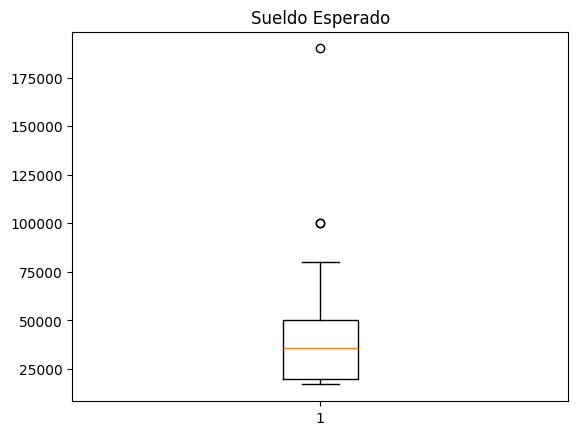

In [89]:
plt.boxplot(df['Sueldo Esperado'])
plt.title("Sueldo Esperado")
plt.show()

Mejores variables:  ['mean_NvlPy_MatRep_SueldoEsp', 'mean_TrabEdad_SueldoEsp', 'min_TrabEdad_SueldoEsp', 'max_TrabEdad_SueldoEsp', 'Trabajo_Level']
R-squared: -1.3907
Mean squared error: 587537576.9512
Root mean squared error: 24239.1744
Intercept: [-14073.04728279]

Feature Coefficients:
                        Feature  Coefficient
0  mean_NvlPy_MatRep_SueldoEsp         0.79
1      mean_TrabEdad_SueldoEsp        -1.03
2       min_TrabEdad_SueldoEsp         0.82
3       max_TrabEdad_SueldoEsp         1.06
4                Trabajo_Level   -10,511.99


/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


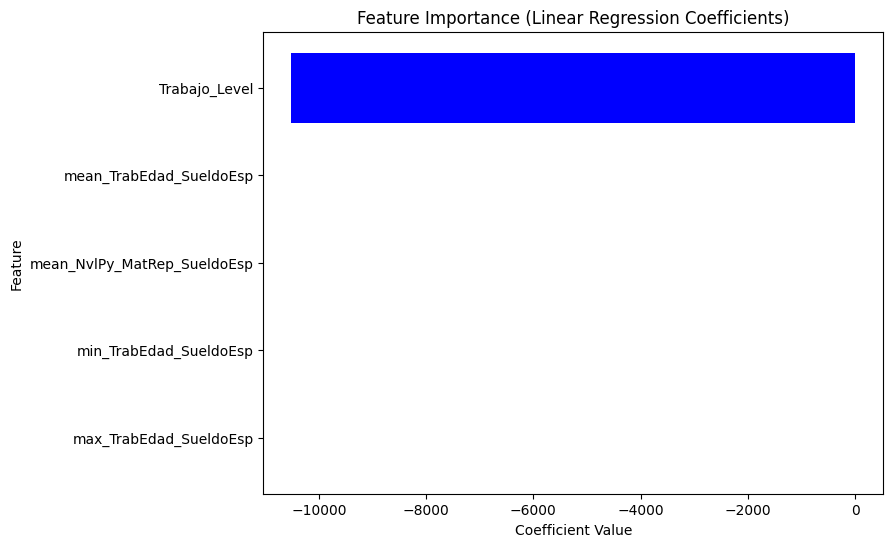

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# dataset inicial
X = df.drop(columns=var_cat)[var_num].join(pd.get_dummies(df[var_cat], dtype='int', drop_first=True))
y = df[target_r]

# Seleccion de mejores variables
kb = SelectKBest( k=5, score_func=f_regression )
kb.fit(X, y)
#print(kb.get_feature_names_out())
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
print("Mejores variables: " , ls_best)
X = pd.DataFrame(kb.transform(X), columns=ls_best)

# Entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()

# Entrenamiento del modelo 
model.fit( X=X_train, y=y_train )

# Make predictions.
y_pred = model.predict(X_test)

# Calculate and print errors.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")

rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

# Extraer información del modelo
print("Intercept:", model.intercept_)


coeff_df = pd.DataFrame({"Feature": X_test.columns, "Coefficient": model.coef_[0]})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(8,6))
plt.barh(coef_df_sorted["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


### Clasificación

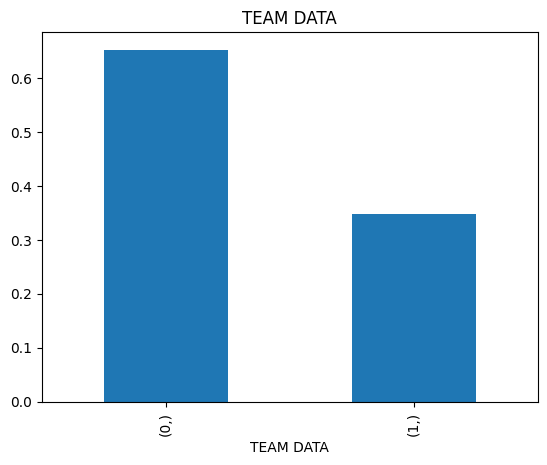

In [91]:
df[target_c].value_counts(normalize=True).plot(kind='bar')
plt.title("TEAM DATA")
plt.show()

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# dataset inicial
X = df.drop(columns=var_cat)[var_num].join(pd.get_dummies(df[var_cat], dtype='int', drop_first=True))
y = df[ target_c ]

# Seleccion de mejores variables
kb = SelectKBest( k=5, score_func=f_regression )
kb.fit(X, y)
#print(kb.get_feature_names_out())
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
print("Mejores variables: " , ls_best)
X = pd.DataFrame(kb.transform(X), columns=ls_best)

# Entrenamiento y test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X
y_train = y

X_test = X
y_test = y

# Modelo
model = LogisticRegression()

# Entrenamiento del modelo
model.fit(X_train, y_train)

# score
model.score(X_train, y_train)


Mejores variables:  ['# Materias reprobadas', 'Calificación esperada Módulo 2', 'mean_MatRep', 'min_MatRep', 'Trabajo_Level']


/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7391304347826086

Intercept: [-11.78372698]

Feature Coefficients:
                           Feature  Coefficient
0           # Materias reprobadas         0.11
1  Calificación esperada Módulo 2         0.72
2                     mean_MatRep         0.43
3                      min_MatRep         0.08
4                   Trabajo_Level        -0.67


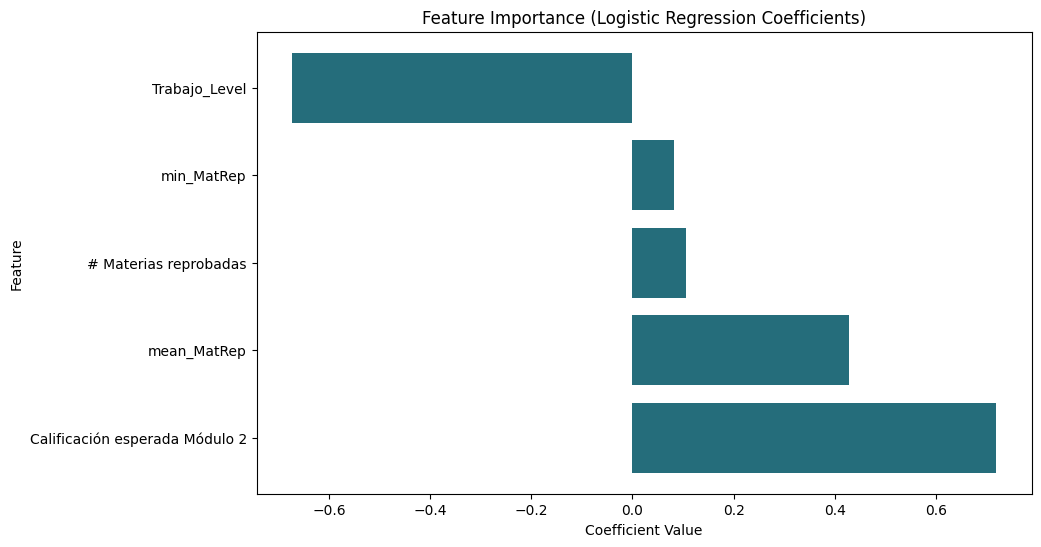

In [93]:
# Extraer información del modelo
print("Intercept:", model.intercept_)
coeff_df = pd.DataFrame({"Feature": X_test[ ls_best ].columns, "Coefficient": model.coef_[0]})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient", color="#256D7B")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

In [94]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, model.predict(X_test))
cnf_matrix

array([[14,  1],
       [ 5,  3]])

Text(0.5, 427.9555555555555, 'Predicted label')

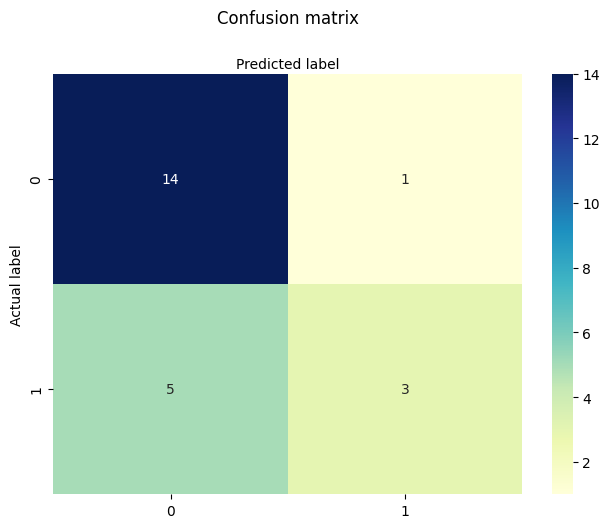

In [95]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [97]:
from sklearn.metrics import classification_report
target_names = ['NO TEAM DATA', 'TEAM DATA']
print(classification_report(y_test, model.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

NO TEAM DATA       0.74      0.93      0.82        15
   TEAM DATA       0.75      0.38      0.50         8

    accuracy                           0.74        23
   macro avg       0.74      0.65      0.66        23
weighted avg       0.74      0.74      0.71        23



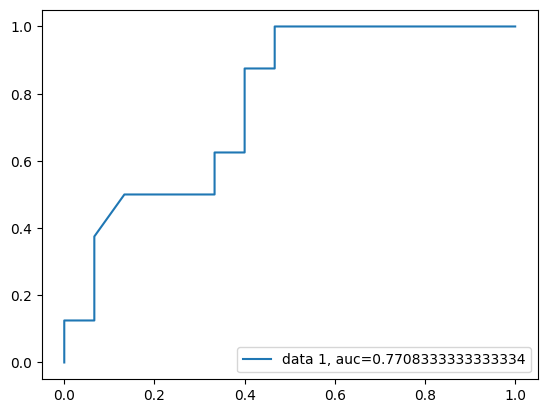

In [98]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()